In [1]:
import sys
sys.path.insert(0, '../')

import numpy as np
import matplotlib.pyplot as plt
from run_experiment import *


%load_ext autoreload
%autoreload 2

**Comparing the behavior of algorithms together in different graphs** 

Graph creation...
Graph creation : Done
-------------------------------------------------------------------------------------------
Using the graph : Random_Sparse_graph
Agents creation, random (start, destination) assignment and all possible paths computation ...
Agents creation, random (start, destination) assignment and all possible paths computation  : Done
-------------------------------------------------------------------------------------------
Oracle calculations ==> Global optimal paths and costs...
Testing 1125 combination of paths
Total time to compute costs:0.23 s
 => The minimal cost is :  6.0
 => The optimal paths are :  [[7, 1, 2], [4, 5], [4, 2], [3, 1, 6]]
Oracle calculations ==> Global optimal paths and costs : Done
-------------------------------------------------------------------------------------------



Paths found by the agents :
sto1   {'path': [7, 1, 2], 'cost': 3.0}
adv1   {'path': [4, 3, 5], 'cost': 2.0}
hyb1   {'path': [4, 2], 'cost': 1.0}
Final total cost on the network : 6.0


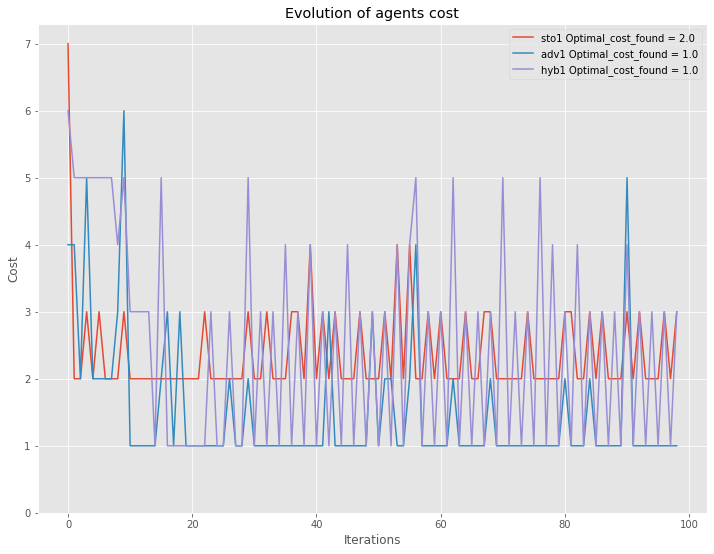

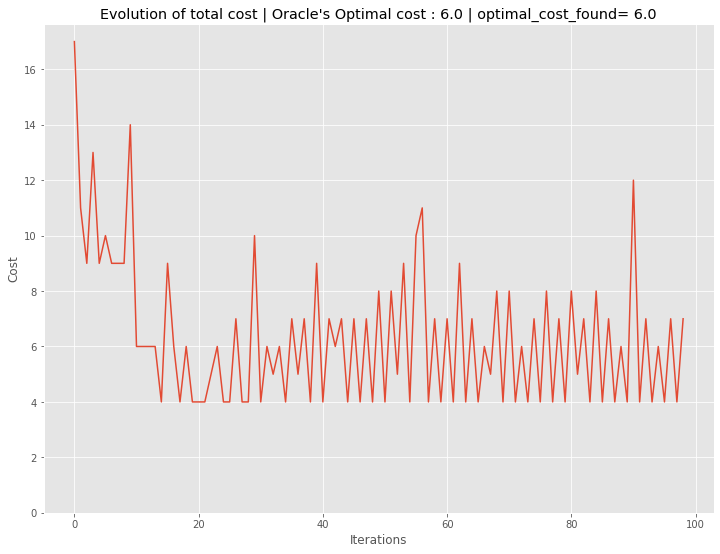

****************************************************************************************************************************


In [11]:
graphs = [
    'Random_Sparse_graph', 
#           'Sioux_Falls',
#         'OW'
         ]
n_players = 1
for graph in graphs : 
    g, adj_matrix, all_edges = create_graph(graph_type=graph, number_vertices=8, dropout_edge_rate=0.5)
    print('Using the graph : '+ graph, end='\n')
    summary_experiences = run_experiment_compar(g, adj_matrix, all_edges, 
                                                       assignement_type='random', 
                                                       nb_iterations=100,
                                                       n_sto=n_players, n_adv=n_players, n_hyb=n_players, n_rand=1, n_fix=0,
                                                       exploration_parameter_stoc=5, lr_type_exp2=3, eta_hyb=0.1, Bt_hyb=0.01, use_adaptif_lr_hyb=True,
                                                       gamma_hyb=1., time_limit=60)

**Using Adaptif learning rate for Hybrid agent**

Graph creation...
Graph creation : Done
-------------------------------------------------------------------------------------------
Using Adaptif learning  = False
Agents creation, fixed (start, destination) assignment and all possible paths computation ...
Agents creation, fixed (start, destination) assignment and all possible paths computation  : Done
-------------------------------------------------------------------------------------------
Oracle calculations ==> Global optimal paths and costs...
Time depassed 40 seconds, only 15433 combinations where tested
Total time to compute costs:40.01 s
 => The minimal cost is :  131.0
 => The optimal paths are :  [[12, 9, 6], [3, 6, 9], [1, 3, 6, 9, 11], [12, 10, 7, 4, 1], [7, 3, 2], [12, 10, 6, 5]]
Oracle calculations ==> Global optimal paths and costs : Done
-------------------------------------------------------------------------------------------



Paths found by the agents :
sto1   {'path': [12, 10, 9, 6], 'cost': 23.0}
sto2   {'path': [3, 6, 9], 'cost': 10.0}
adv1   {'path': [1, 4, 3, 7, 10, 6, 2, 5, 8, 9, 11], 'cost': 106.0}
adv2   {'path': [12, 9, 11, 8, 5, 2, 6, 3, 7, 4, 1], 'cost': 121.0}
hyb1   {'path': [7, 10, 12, 9, 11, 8, 5, 6, 3, 2], 'cost': 67.0}
hyb2   {'path': [12, 9, 10, 7, 4, 1, 3, 6, 2, 5], 'cost': 108.0}
Final total cost on the network : 435.0


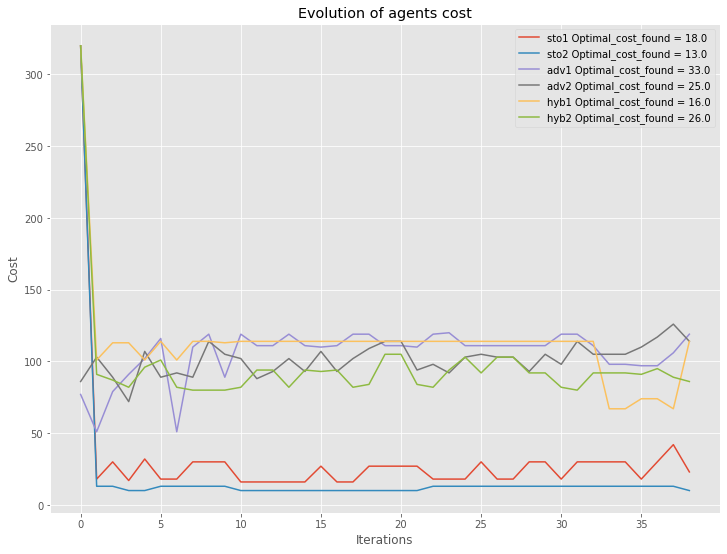

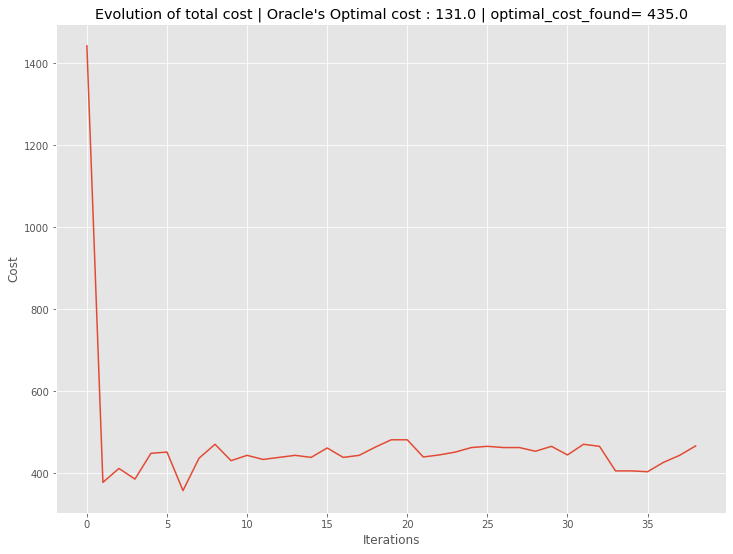

****************************************************************************************************************************
Using Adaptif learning  = True
Agents creation, fixed (start, destination) assignment and all possible paths computation ...
Agents creation, fixed (start, destination) assignment and all possible paths computation  : Done
-------------------------------------------------------------------------------------------
Oracle calculations ==> Global optimal paths and costs...
Time depassed 40 seconds, only 35976 combinations where tested
Total time to compute costs:40.00 s
 => The minimal cost is :  131.0
 => The optimal paths are :  [[12, 9, 6], [3, 6, 9], [1, 3, 6, 9, 11], [12, 10, 7, 4, 1], [7, 3, 2], [12, 10, 6, 5]]
Oracle calculations ==> Global optimal paths and costs : Done
-------------------------------------------------------------------------------------------



Paths found by the agents :
sto1   {'path': [12, 10, 6], 'cost': 32.0}
sto2   {'path': [3, 6, 9], 'cost': 10.0}
adv1   {'path': [1, 4, 7, 3, 2, 5, 6, 10, 12, 9, 11], 'cost': 102.0}
adv2   {'path': [12, 10, 6, 9, 11, 8, 5, 2, 3, 7, 4, 1], 'cost': 114.0}
hyb1   {'path': [7, 10, 9, 11, 8, 5, 6, 3, 2], 'cost': 78.0}
hyb2   {'path': [12, 10, 7, 4, 1, 3, 2, 6, 9, 11, 8, 5], 'cost': 84.0}
Final total cost on the network : 420.0


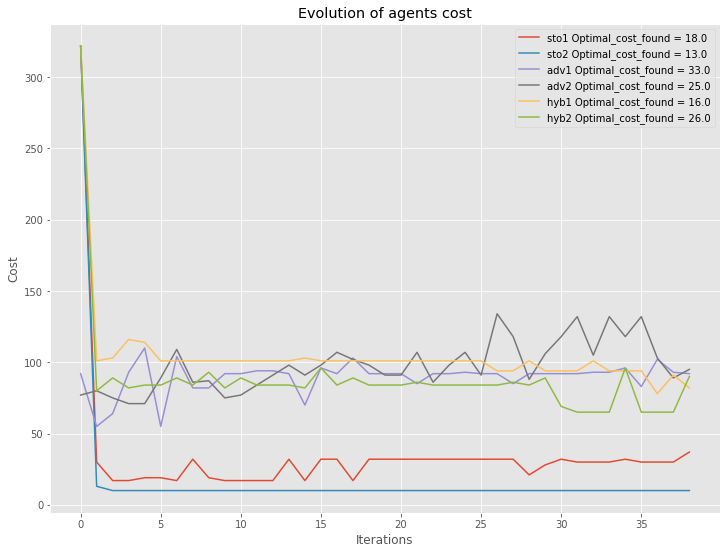

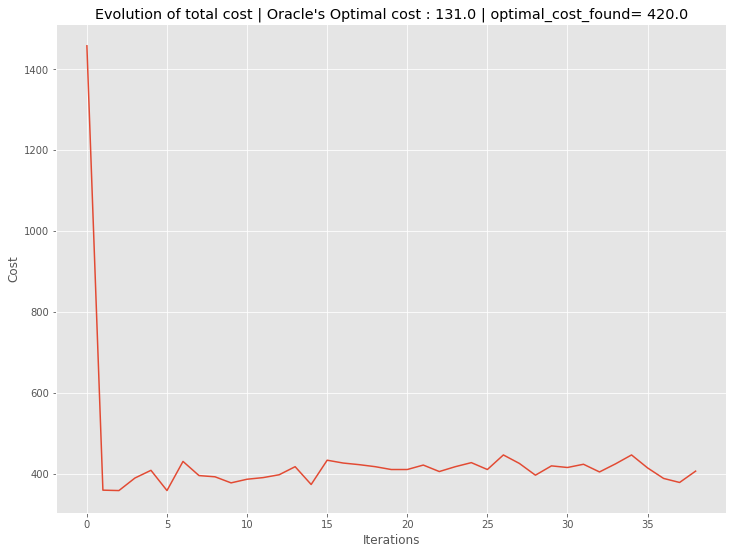

****************************************************************************************************************************


In [33]:
n_players = 2
Adaptif_learning = [False, True]
graph = 'OW'
g, adj_matrix, all_edges = create_graph(graph_type=graph, number_vertices=20, dropout_edge_rate=0.85)
for i, al_ in enumerate(Adaptif_learning) : 
    print('Using Adaptif learning  = {}'.format(al_), end='\n')
    if i==0:
        summary_experiences, dests = run_experiment_compar(g, adj_matrix, all_edges, assignement_type='fixed', nb_iterations=100, n_sto=n_players, n_adv=n_players, n_hyb=n_players, 
                                   n_rand=0, n_fix=0, exploration_parameter_stoc=5, eta_hyb=0.1, Bt_hyb=0.01, use_adaptif_lr_hyb=al_,
                                gamma_hyb=1., time_limit=40)
    else:
        summary_experiences, dests = run_experiment_compar(g, adj_matrix, all_edges, assignement_type='fixed', assignement_dests=dests, nb_iterations=100, n_sto=n_players, n_adv=n_players, n_hyb=n_players, 
                                   n_rand=0, n_fix=0, exploration_parameter_stoc=5, eta_hyb=0.1, Bt_hyb=0.01, use_adaptif_lr_hyb=al_,
                                gamma_hyb=1., time_limit=40)
        

**Impact of gamma parameter for Hybrid agent**

Graph creation...
Graph creation : Done
-------------------------------------------------------------------------------------------
Using Gamma for hybrid agents  = 0.5
Agents creation, fixed (start, destination) assignment and all possible paths computation ...
Agents creation, fixed (start, destination) assignment and all possible paths computation  : Done
-------------------------------------------------------------------------------------------
Oracle calculations ==> Global optimal paths and costs...
Time depassed 1 seconds, only 765 combinations where tested
Total time to compute costs:1.00 s
 => The minimal cost is :  107.0
 => The optimal paths are :  [[7, 6], [7, 4], [2, 5, 8], [2, 3, 1], [10, 7], [4, 3, 6], [8, 9, 6, 2], [12, 10, 9]]
Oracle calculations ==> Global optimal paths and costs : Done
-------------------------------------------------------------------------------------------



Paths found by the agents :
hyb1   {'path': [7, 6], 'cost': 9.0}
hyb2   {'path': [7, 3, 1, 4], 'cost': 53.0}
hyb3   {'path': [2, 5, 6, 9, 11, 8], 'cost': 37.0}
hyb4   {'path': [2, 3, 4, 1], 'cost': 36.0}
Final total cost on the network : 135.0


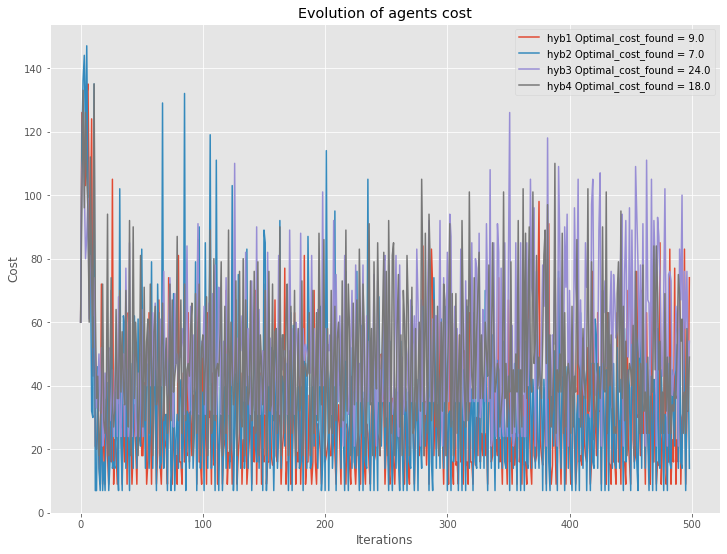

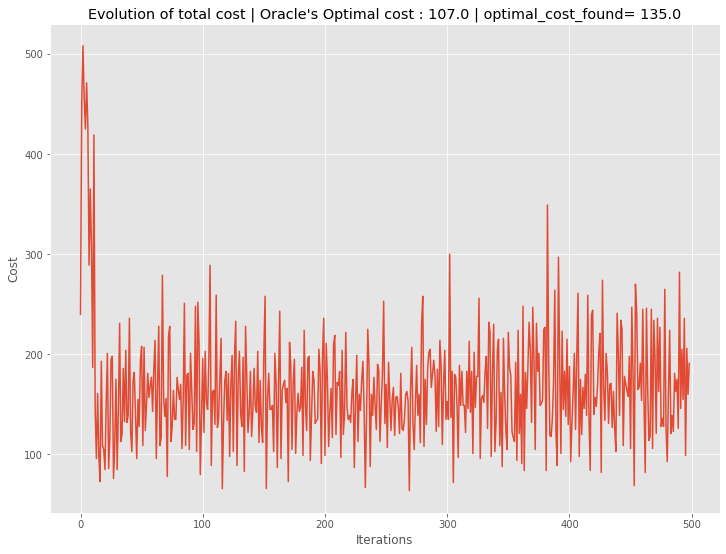

****************************************************************************************************************************
Using Gamma for hybrid agents  = 1
Agents creation, fixed (start, destination) assignment and all possible paths computation ...
Agents creation, fixed (start, destination) assignment and all possible paths computation  : Done
-------------------------------------------------------------------------------------------
Oracle calculations ==> Global optimal paths and costs...
Time depassed 1 seconds, only 802 combinations where tested
Total time to compute costs:1.00 s
 => The minimal cost is :  131.0
 => The optimal paths are :  [[7, 6], [7, 4], [2, 5, 8], [2, 3, 1], [4, 3, 6, 9], [7, 6, 9], [7, 10, 9, 8], [12, 10, 7]]
Oracle calculations ==> Global optimal paths and costs : Done
-------------------------------------------------------------------------------------------



Paths found by the agents :
hyb1   {'path': [7, 6], 'cost': 9.0}
hyb2   {'path': [7, 10, 6, 2, 3, 1, 4], 'cost': 101.0}
hyb3   {'path': [2, 3, 1, 4, 7, 6, 10, 9, 8], 'cost': 87.0}
hyb4   {'path': [2, 6, 3, 1], 'cost': 27.0}
Final total cost on the network : 224.0


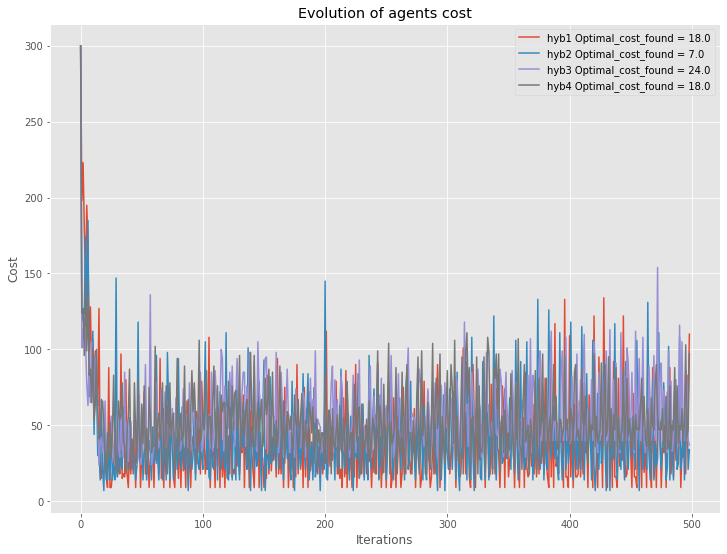

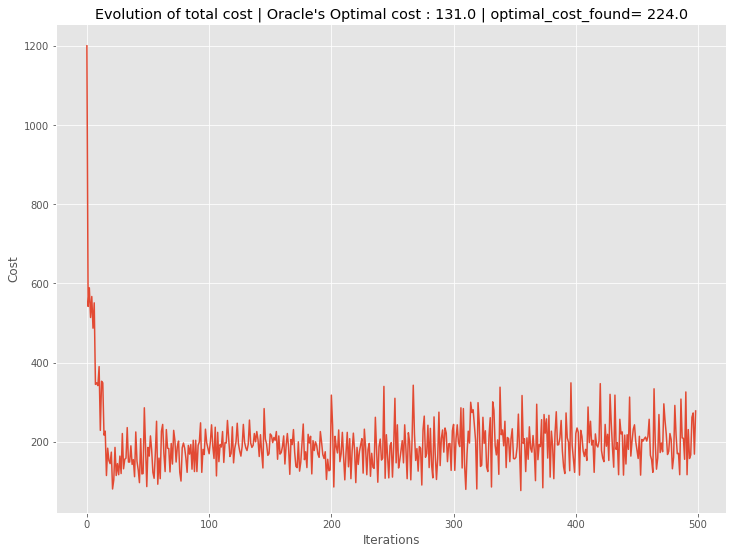

****************************************************************************************************************************
Using Gamma for hybrid agents  = 3
Agents creation, fixed (start, destination) assignment and all possible paths computation ...
Agents creation, fixed (start, destination) assignment and all possible paths computation  : Done
-------------------------------------------------------------------------------------------
Oracle calculations ==> Global optimal paths and costs...
Time depassed 1 seconds, only 945 combinations where tested
Total time to compute costs:1.00 s
 => The minimal cost is :  132.0
 => The optimal paths are :  [[7, 6], [7, 4], [2, 5, 8], [2, 3, 1], [8, 5, 6], [12, 9, 6, 3], [5, 6, 9], [12, 10, 7, 4]]
Oracle calculations ==> Global optimal paths and costs : Done
-------------------------------------------------------------------------------------------



Paths found by the agents :
hyb1   {'path': [7, 10, 6], 'cost': 16.0}
hyb2   {'path': [7, 4], 'cost': 7.0}
hyb3   {'path': [2, 5, 6, 7, 10, 9, 8], 'cost': 53.0}
hyb4   {'path': [2, 3, 1], 'cost': 18.0}
Final total cost on the network : 94.0


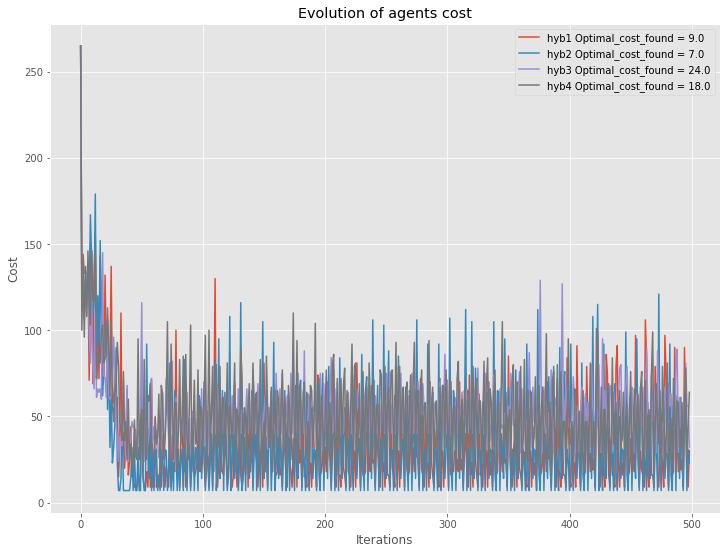

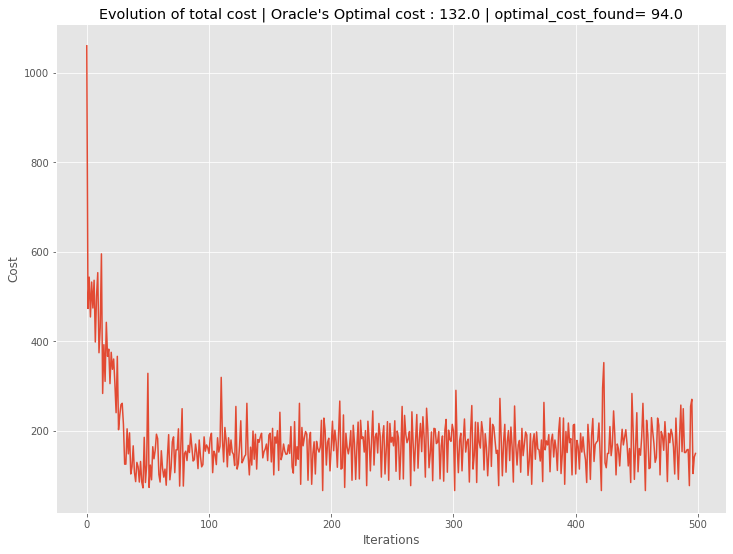

****************************************************************************************************************************
Using Gamma for hybrid agents  = 7
Agents creation, fixed (start, destination) assignment and all possible paths computation ...
Agents creation, fixed (start, destination) assignment and all possible paths computation  : Done
-------------------------------------------------------------------------------------------
Oracle calculations ==> Global optimal paths and costs...
Time depassed 1 seconds, only 947 combinations where tested
Total time to compute costs:1.00 s
 => The minimal cost is :  128.0
 => The optimal paths are :  [[7, 6], [7, 4], [2, 5, 8], [2, 3, 1], [3, 6], [8, 9, 12], [11, 8, 9, 6, 5], [10, 7, 3, 2]]
Oracle calculations ==> Global optimal paths and costs : Done
-------------------------------------------------------------------------------------------



Paths found by the agents :
hyb1   {'path': [7, 4, 3, 6], 'cost': 35.0}
hyb2   {'path': [7, 10, 6, 3, 1, 4], 'cost': 52.0}
hyb3   {'path': [2, 5, 8], 'cost': 24.0}
hyb4   {'path': [2, 3, 4, 1], 'cost': 32.0}
Final total cost on the network : 143.0


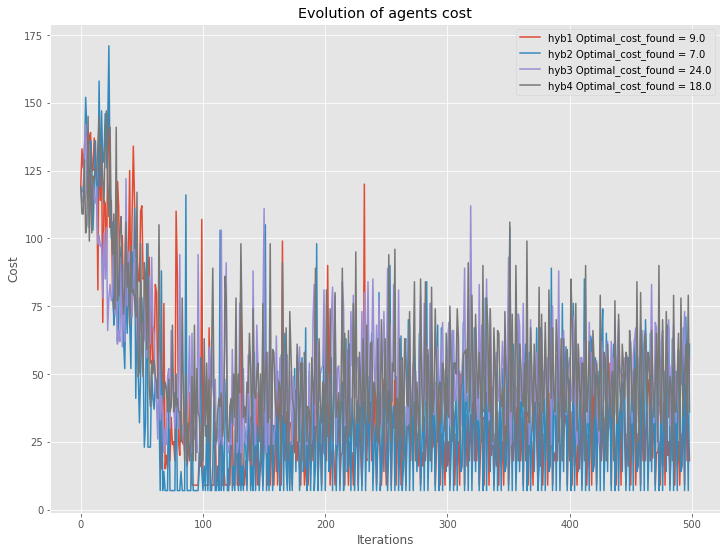

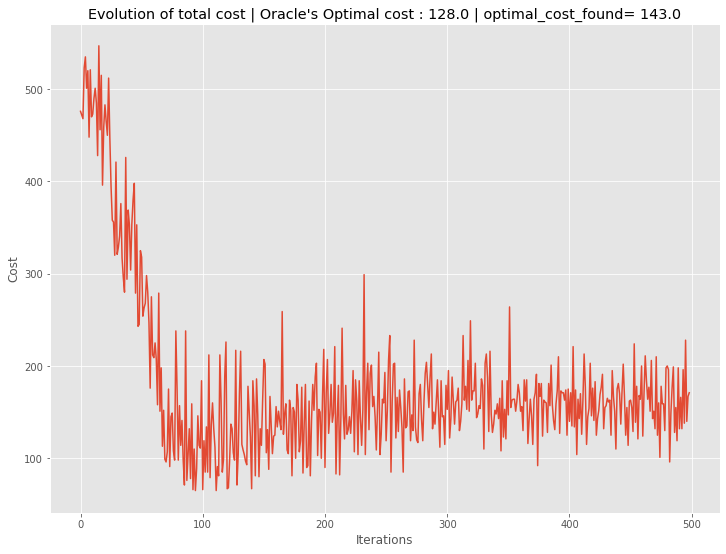

****************************************************************************************************************************
Using Gamma for hybrid agents  = 10
Agents creation, fixed (start, destination) assignment and all possible paths computation ...
Agents creation, fixed (start, destination) assignment and all possible paths computation  : Done
-------------------------------------------------------------------------------------------
Oracle calculations ==> Global optimal paths and costs...
Time depassed 1 seconds, only 1090 combinations where tested
Total time to compute costs:1.00 s
 => The minimal cost is :  132.0
 => The optimal paths are :  [[7, 6], [7, 4], [2, 5, 8], [2, 3, 1], [12, 9, 6, 3], [9, 10], [6, 3, 4, 1], [8, 9, 10]]
Oracle calculations ==> Global optimal paths and costs : Done
-------------------------------------------------------------------------------------------



Paths found by the agents :
hyb1   {'path': [7, 10, 6], 'cost': 16.0}
hyb2   {'path': [7, 4], 'cost': 7.0}
hyb3   {'path': [2, 3, 6, 5, 8], 'cost': 49.0}
hyb4   {'path': [2, 5, 8, 9, 6, 10, 7, 3, 1], 'cost': 72.0}
Final total cost on the network : 144.0


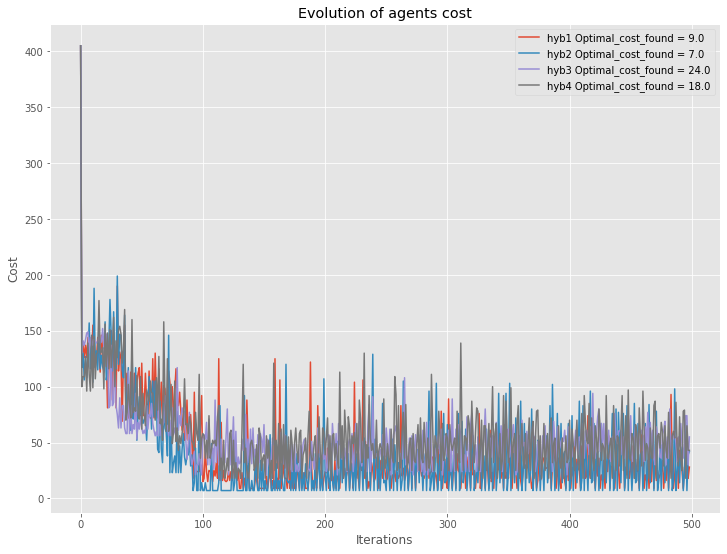

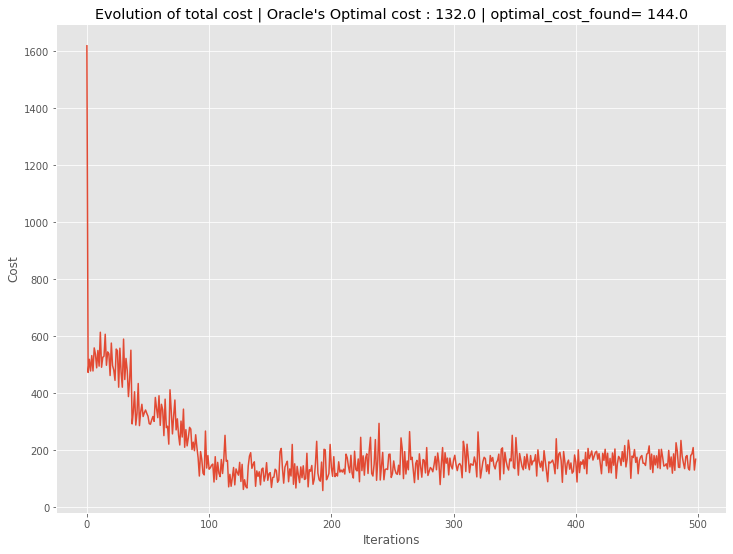

****************************************************************************************************************************


In [4]:
n_players = 4
gammas = [0.5, 1, 3, 7, 10]
graph = 'OW'
g, adj_matrix, all_edges = create_graph(graph_type=graph, number_vertices=20, dropout_edge_rate=0.85)
for i, gamma in enumerate(gammas) : 
    print('Using Gamma for hybrid agents  = {}'.format(gamma), end='\n')
    if i==0:
        summary_experiences, dests = run_experiment_compar(g, adj_matrix, all_edges, assignement_type='fixed', nb_iterations=500, n_sto=0, n_adv=0, n_hyb=n_players, 
                                   n_rand=3, n_fix=1, exploration_parameter_stoc=5, eta_hyb=0.1, Bt_hyb=0.01, use_adaptif_lr_hyb=True,
                                gamma_hyb=gamma, time_limit=1)
    else:
        summary_experiences, dests = run_experiment_compar(g, adj_matrix, all_edges, assignement_type='fixed', assignement_dests=dests, nb_iterations=500, n_sto=0, n_adv=0, n_hyb=n_players, 
                                   n_rand=3, n_fix=1, exploration_parameter_stoc=5, eta_hyb=0.1, Bt_hyb=0.01, use_adaptif_lr_hyb=True,
                                gamma_hyb=gamma, time_limit=1)
        

**Impact of Bt parameter for Hybrid agent**

In [ ]:
n_players = 2
B_ts = [0.01, 0.1, 0.5, 1, 2]
graph = 'OW'
g, adj_matrix, all_edges = create_graph(graph_type=graph, number_vertices=20, dropout_edge_rate=0.85)
for i, Bt in enumerate(B_ts) : 
    print('Using B_t for hybrid agents  = {}'.format(Bt), end='\n')
    if i==0:
        summary_experiences, dests = run_experiment_compar(g, adj_matrix, all_edges, assignement_type='fixed', nb_iterations=100, n_sto=n_players, n_adv=n_players, n_hyb=n_players, 
                                   n_rand=0, n_fix=0, exploration_parameter_stoc=5, eta_hyb=0.1, Bt_hyb=Bt, use_adaptif_lr_hyb=True,
                                gamma_hyb=1., time_limit=40)
    else:
        summary_experiences, dests = run_experiment_compar(g, adj_matrix, all_edges, assignement_type='fixed', assignement_dests=dests, nb_iterations=100, n_sto=n_players, n_adv=n_players, n_hyb=n_players, 
                                   n_rand=0, n_fix=0, exploration_parameter_stoc=5, eta_hyb=0.1, Bt_hyb=Bt, use_adaptif_lr_hyb=True,
                                gamma_hyb=1., time_limit=40)
        

**Comparing the behavior of algorithms when adding random agents** 

Graph creation...
Graph creation : Done
-------------------------------------------------------------------------------------------
Number of agents with random path = 1
Agents creation, random (start, destination) assignment and all possible paths computation ...
Agents creation, random (start, destination) assignment and all possible paths computation  : Done
-------------------------------------------------------------------------------------------
Oracle calculations ==> Global optimal paths and costs...
Time depassed 1 seconds, only 2699 combinations where tested
Total time to compute costs:1.00 s
 => The minimal cost is :  85.0
 => The optimal paths are :  [[3, 2, 5, 8], [3, 6, 9, 11], [6, 7, 10, 12], [1, 3, 6]]
Oracle calculations ==> Global optimal paths and costs : Done
-------------------------------------------------------------------------------------------



Paths found by the agents :
sto1   {'path': [3, 6, 9, 8], 'cost': 26.0}
adv1   {'path': [3, 7, 10, 9, 11], 'cost': 33.0}
hyb1   {'path': [6, 3, 7, 10, 9, 12], 'cost': 47.0}
Final total cost on the network : 106.0


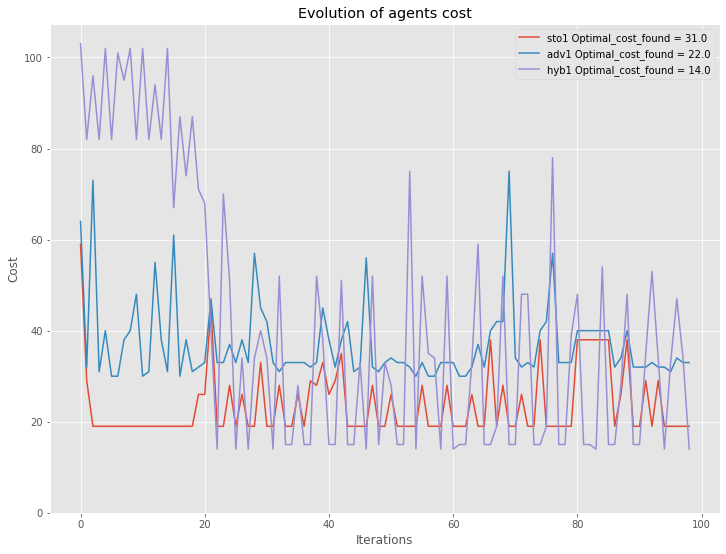

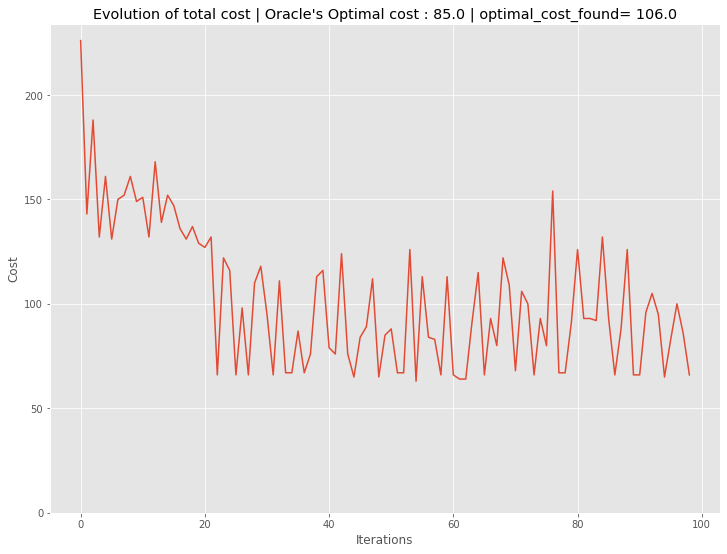

****************************************************************************************************************************
Number of agents with random path = 2
Agents creation, random (start, destination) assignment and all possible paths computation ...
Agents creation, random (start, destination) assignment and all possible paths computation  : Done
-------------------------------------------------------------------------------------------
Oracle calculations ==> Global optimal paths and costs...
Time depassed 1 seconds, only 2554 combinations where tested
Total time to compute costs:1.00 s
 => The minimal cost is :  82.0
 => The optimal paths are :  [[8, 5], [9, 6, 3, 4], [11, 9, 12], [6, 3], [8, 9, 6, 7]]
Oracle calculations ==> Global optimal paths and costs : Done
-------------------------------------------------------------------------------------------



Paths found by the agents :
sto1   {'path': [8, 5], 'cost': 26.0}
adv1   {'path': [9, 6, 3, 4], 'cost': 17.0}
hyb1   {'path': [11, 9, 10, 12], 'cost': 23.0}
Final total cost on the network : 66.0


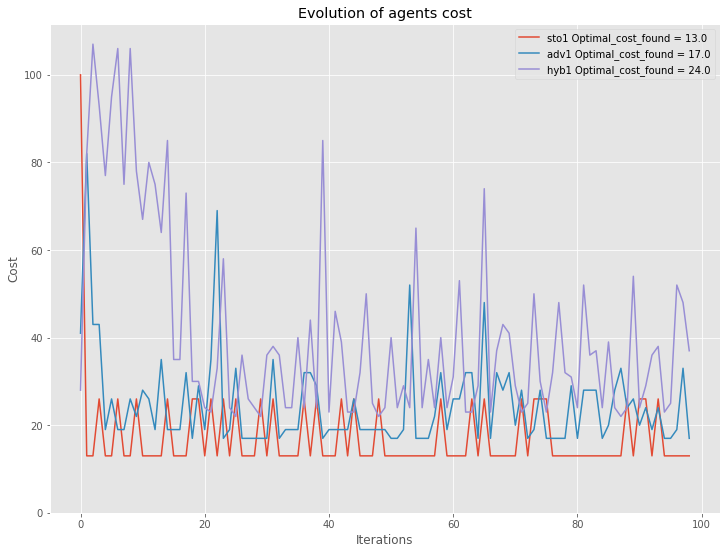

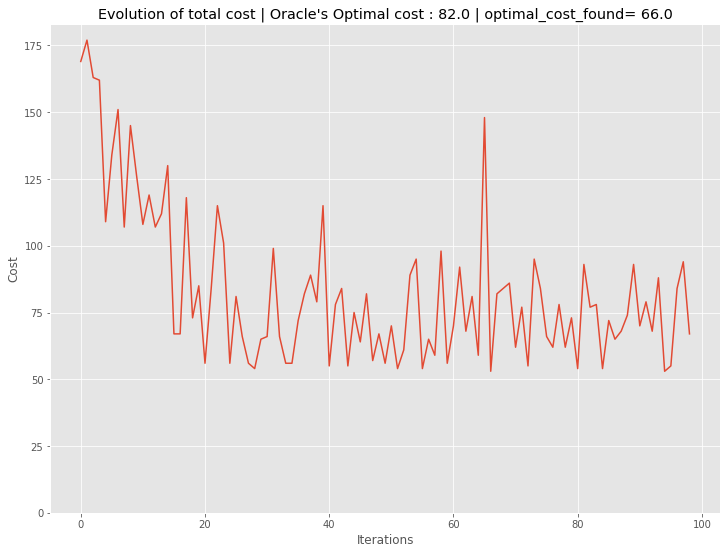

****************************************************************************************************************************
Number of agents with random path = 5
Agents creation, random (start, destination) assignment and all possible paths computation ...
Agents creation, random (start, destination) assignment and all possible paths computation  : Done
-------------------------------------------------------------------------------------------
Oracle calculations ==> Global optimal paths and costs...
Time depassed 1 seconds, only 1913 combinations where tested
Total time to compute costs:1.00 s
 => The minimal cost is :  118.0
 => The optimal paths are :  [[2, 3, 7], [7, 3, 2], [10, 12], [9, 10], [2, 6, 10], [5, 6], [5, 8, 9, 10, 12], [4, 1]]
Oracle calculations ==> Global optimal paths and costs : Done
-------------------------------------------------------------------------------------------



Paths found by the agents :
sto1   {'path': [2, 3, 7], 'cost': 25.0}
adv1   {'path': [7, 6, 2], 'cost': 18.0}
hyb1   {'path': [10, 7, 3, 6, 9, 12], 'cost': 55.0}
Final total cost on the network : 98.0


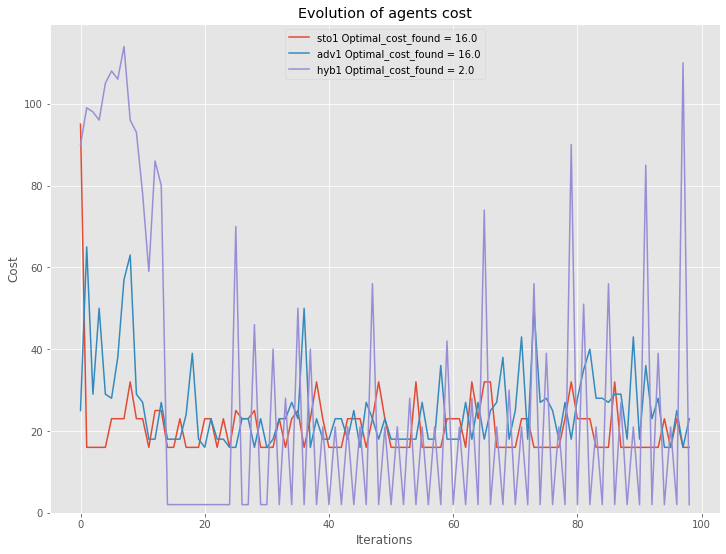

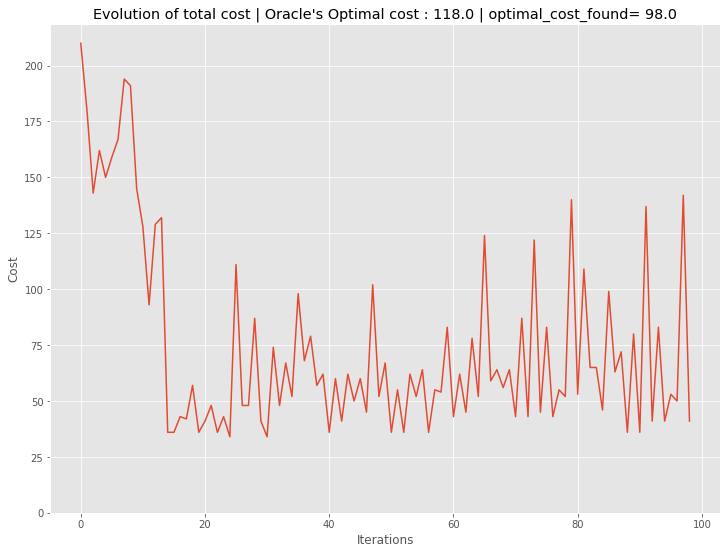

****************************************************************************************************************************
Number of agents with random path = 8
Agents creation, random (start, destination) assignment and all possible paths computation ...
Agents creation, random (start, destination) assignment and all possible paths computation  : Done
-------------------------------------------------------------------------------------------
Oracle calculations ==> Global optimal paths and costs...
Time depassed 1 seconds, only 1566 combinations where tested
Total time to compute costs:1.00 s
 => The minimal cost is :  202.0
 => The optimal paths are :  [[8, 5], [8, 9, 10], [11, 9, 6, 3, 4], [11, 8], [7, 10], [10, 7, 4], [2, 3, 4], [11, 9, 12], [2, 6, 9], [7, 3, 2], [11, 8, 9, 6, 3]]
Oracle calculations ==> Global optimal paths and costs : Done
-------------------------------------------------------------------------------------------



Paths found by the agents :
sto1   {'path': [8, 5], 'cost': 13.0}
adv1   {'path': [8, 11, 9, 10], 'cost': 27.0}
hyb1   {'path': [11, 9, 12, 10, 6, 2, 3, 4], 'cost': 93.0}
Final total cost on the network : 133.0


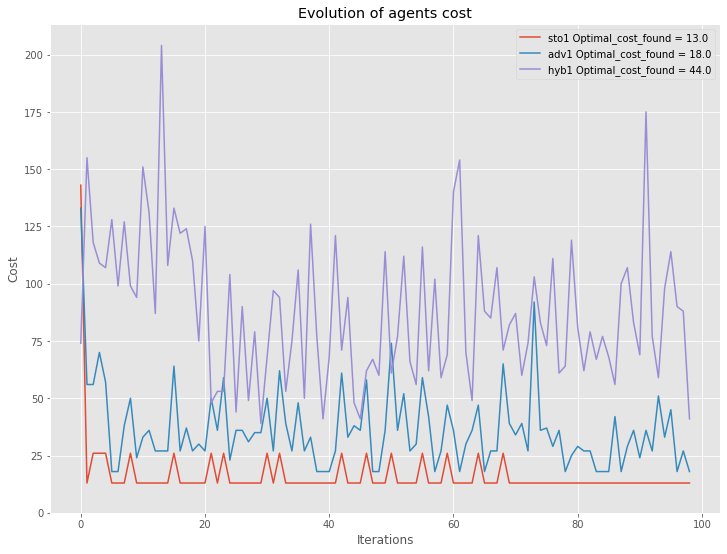

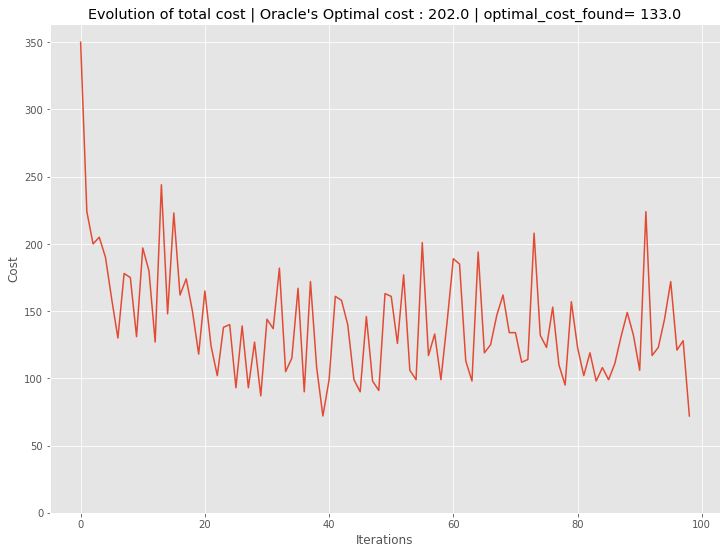

****************************************************************************************************************************
Number of agents with random path = 10
Agents creation, random (start, destination) assignment and all possible paths computation ...
Agents creation, random (start, destination) assignment and all possible paths computation  : Done
-------------------------------------------------------------------------------------------
Oracle calculations ==> Global optimal paths and costs...
Time depassed 1 seconds, only 1562 combinations where tested
Total time to compute costs:1.00 s
 => The minimal cost is :  278.0
 => The optimal paths are :  [[3, 6, 9, 12], [6, 3, 4], [4, 7], [12, 9, 11], [1, 3, 6, 9, 12], [7, 6, 5, 8], [6, 9], [9, 8], [12, 9, 8], [2, 3], [2, 3], [9, 6, 2], [3, 7, 10, 9, 8]]
Oracle calculations ==> Global optimal paths and costs : Done
-------------------------------------------------------------------------------------------



Paths found by the agents :
sto1   {'path': [3, 7, 10, 12], 'cost': 20.0}
adv1   {'path': [6, 10, 7, 4], 'cost': 36.0}
hyb1   {'path': [4, 1, 3, 2, 6, 7], 'cost': 69.0}
Final total cost on the network : 125.0


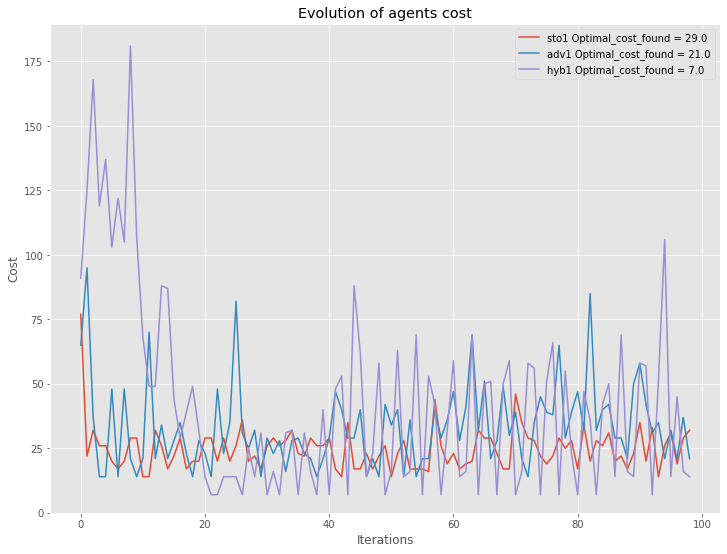

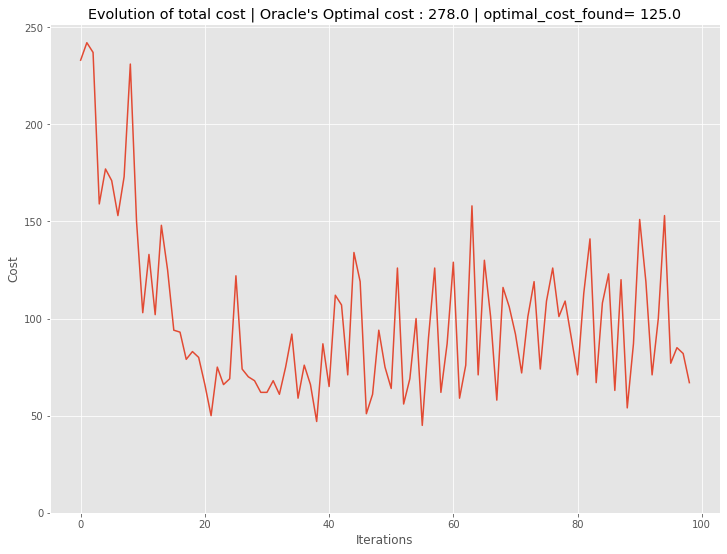

****************************************************************************************************************************


In [16]:
n_players = 1
n_rnd_agents = [1, 2, 5, 8, 10]
graph = 'OW'
g, adj_matrix, all_edges = create_graph(graph_type=graph, number_vertices=20, dropout_edge_rate=0.8)
for i, n_randx in enumerate(n_rnd_agents) : 
    print('Number of agents with random path = {}'.format(n_randx), end='\n')
    summary_experiences = run_experiment_compar(g, adj_matrix, all_edges, assignement_type='random', nb_iterations=100, n_sto=n_players, n_adv=n_players, n_hyb=n_players, 
                                   n_rand=n_randx, n_fix=0, exploration_parameter_stoc=5, eta_hyb=0.1, Bt_hyb=0.01, use_adaptif_lr_hyb=False,
                                gamma_hyb=1., time_limit=1)

        
        
        

Graph creation...
Graph creation : Done
-------------------------------------------------------------------------------------------
Number of agents with random path = 1
Agents creation, random (start, destination) assignment and all possible paths computation ...
Agents creation, random (start, destination) assignment and all possible paths computation  : Done
-------------------------------------------------------------------------------------------
Oracle calculations ==> Global optimal paths and costs...
Time depassed 1 seconds, only 1363 combinations where tested
Total time to compute costs:1.00 s
 => The minimal cost is :  67.53652100708473
 => The optimal paths are :  [[17, 15], [3, 10, 9, 14], [21, 14], [5, 7, 6, 17]]
Oracle calculations ==> Global optimal paths and costs : Done
-------------------------------------------------------------------------------------------



Paths found by the agents :
sto1   {'path': [17, 15], 'cost': 3.1658348757764214}
adv1   {'path': [3, 2, 11, 12, 23, 20, 19, 21, 14], 'cost': 65.57976345603251}
hyb1   {'path': [21, 22, 13, 10, 3, 4, 8, 9, 14], 'cost': 73.86902978584068}
Final total cost on the network : 142.6146281176496


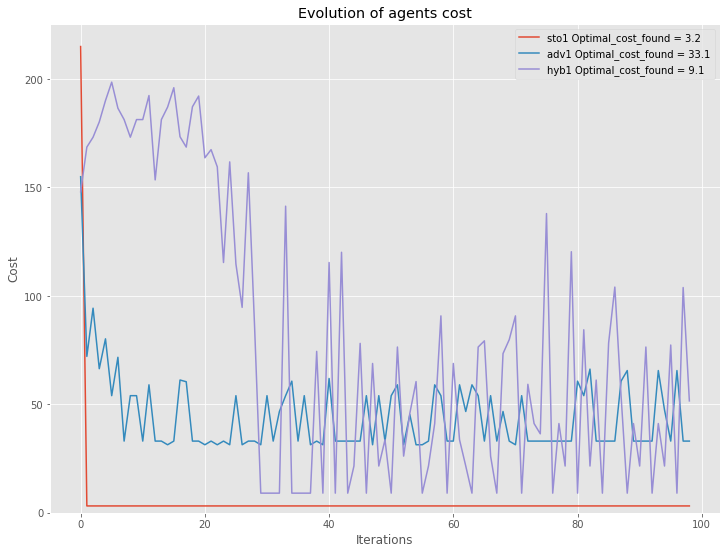

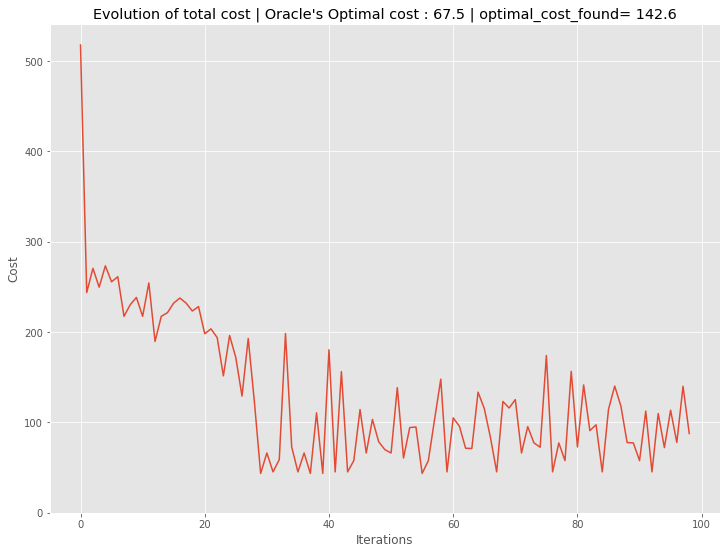

****************************************************************************************************************************
Number of agents with random path = 2
Agents creation, random (start, destination) assignment and all possible paths computation ...
Agents creation, random (start, destination) assignment and all possible paths computation  : Done
-------------------------------------------------------------------------------------------
Oracle calculations ==> Global optimal paths and costs...
Time depassed 1 seconds, only 1300 combinations where tested
Total time to compute costs:1.00 s
 => The minimal cost is :  120.08688335059188
 => The optimal paths are :  [[16, 9, 8, 4], [19, 17, 6, 7], [14, 9, 10, 3, 2], [10, 3, 2, 0], [8, 4, 3, 2, 11, 12]]
Oracle calculations ==> Global optimal paths and costs : Done
-------------------------------------------------------------------------------------------



Paths found by the agents :
sto1   {'path': [16, 9, 8, 4], 'cost': 31.695415096537808}
adv1   {'path': [19, 17, 6, 7], 'cost': 11.875576833176197}
hyb1   {'path': [14, 13, 22, 23, 12, 11, 2], 'cost': 62.71219273947996}
Final total cost on the network : 106.28318466919396


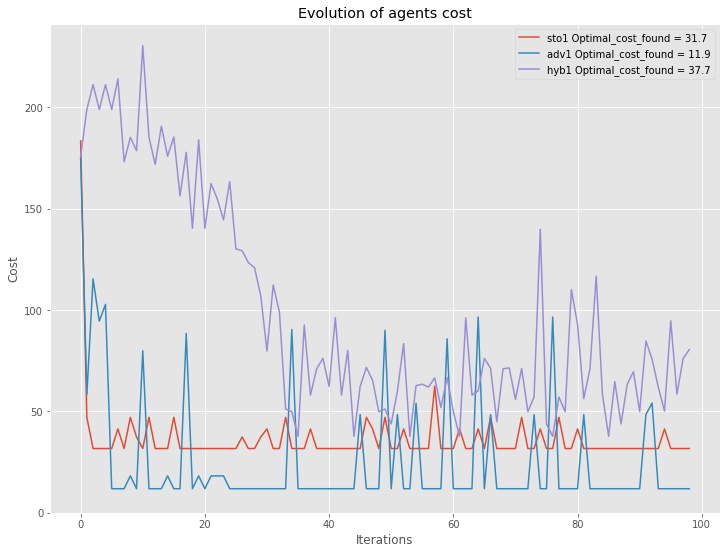

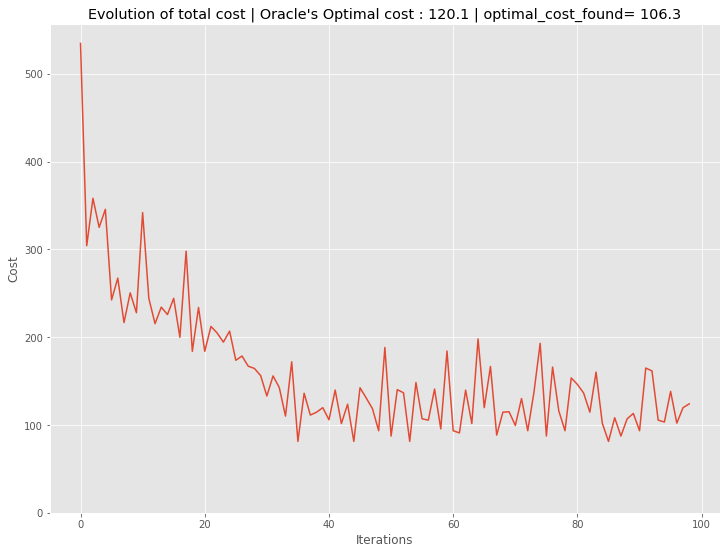

****************************************************************************************************************************
Number of agents with random path = 5
Agents creation, random (start, destination) assignment and all possible paths computation ...
Agents creation, random (start, destination) assignment and all possible paths computation  : Done
-------------------------------------------------------------------------------------------
Oracle calculations ==> Global optimal paths and costs...
Time depassed 1 seconds, only 1027 combinations where tested
Total time to compute costs:1.00 s
 => The minimal cost is :  234.14851732420948
 => The optimal paths are :  [[4, 3, 10, 13, 22], [19, 20, 23], [8, 4, 5], [0, 2, 3, 10, 9, 14], [0, 1, 5, 7, 15], [11, 12, 23, 20], [14, 21], [5, 1, 0, 2, 11, 12, 23]]
Oracle calculations ==> Global optimal paths and costs : Done
-------------------------------------------------------------------------------------------



Paths found by the agents :
sto1   {'path': [4, 3, 10, 13, 22], 'cost': 32.22100270874438}
adv1   {'path': [19, 20, 23], 'cost': 20.08972064120421}
hyb1   {'path': [8, 7, 6, 17, 19, 20, 23, 12, 11, 2, 0, 1, 5], 'cost': 88.19389191106764}
Final total cost on the network : 140.50461526101623


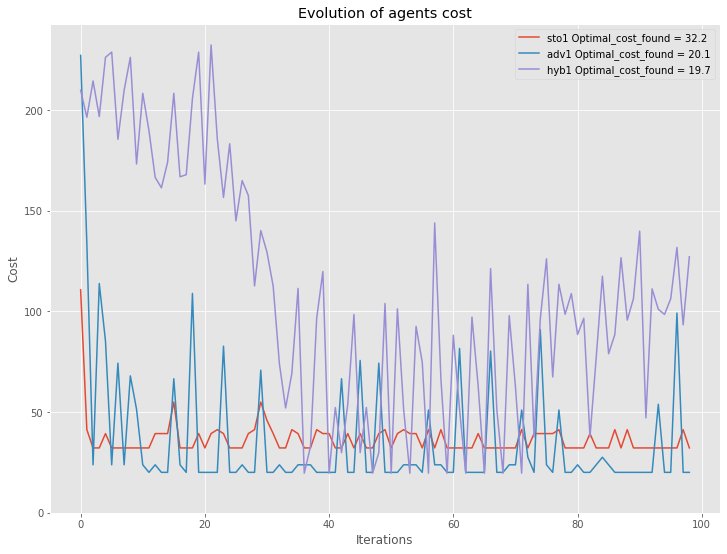

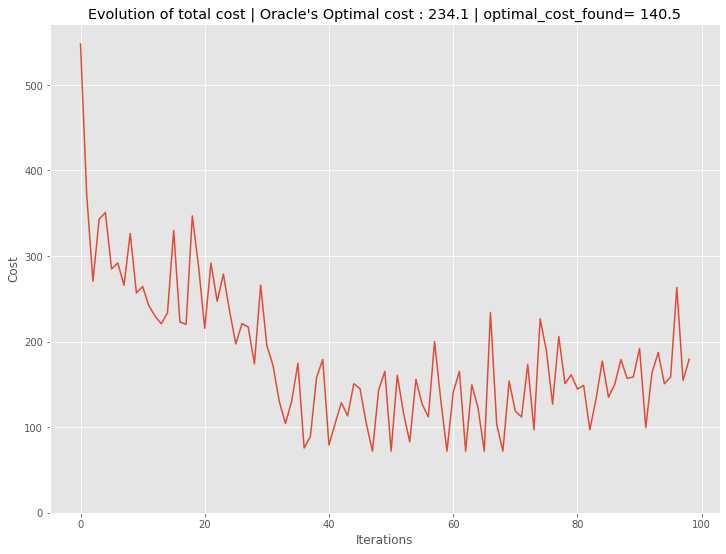

****************************************************************************************************************************
Number of agents with random path = 8
Agents creation, random (start, destination) assignment and all possible paths computation ...
Agents creation, random (start, destination) assignment and all possible paths computation  : Done
-------------------------------------------------------------------------------------------
Oracle calculations ==> Global optimal paths and costs...
Time depassed 1 seconds, only 952 combinations where tested
Total time to compute costs:1.00 s
 => The minimal cost is :  378.4489086307255
 => The optimal paths are :  [[1, 5, 7, 15, 16], [9, 10, 13], [2, 3, 10, 13], [20, 23, 12, 11], [22, 13, 10, 3], [18, 14, 9, 10, 3], [6, 17, 19], [7, 5, 4], [12, 11, 10, 13], [20, 21, 14, 9], [16, 15, 7, 5, 1]]
Oracle calculations ==> Global optimal paths and costs : Done
--------------------------------------------------------------------------------


Paths found by the agents :
sto1   {'path': [1, 5, 7, 6, 17, 15, 16], 'cost': 41.49548527400269}
adv1   {'path': [9, 16, 18, 14, 13], 'cost': 44.790310391135826}
hyb1   {'path': [2, 11, 10, 13], 'cost': 31.446620492985176}
Final total cost on the network : 117.7324161581237


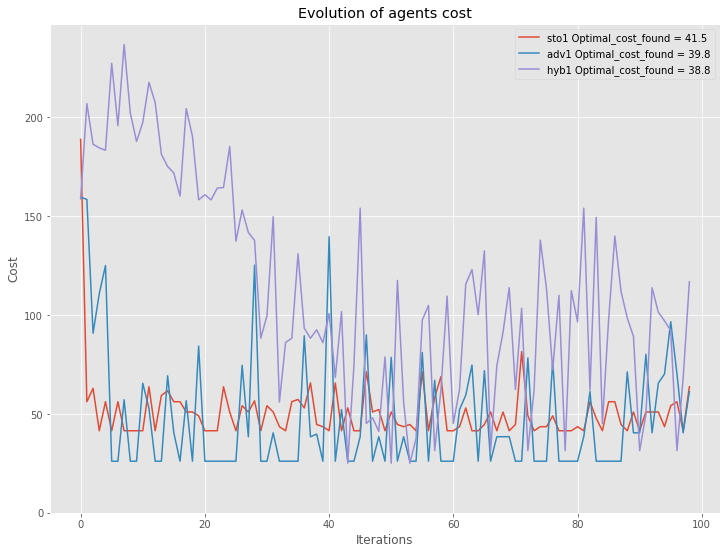

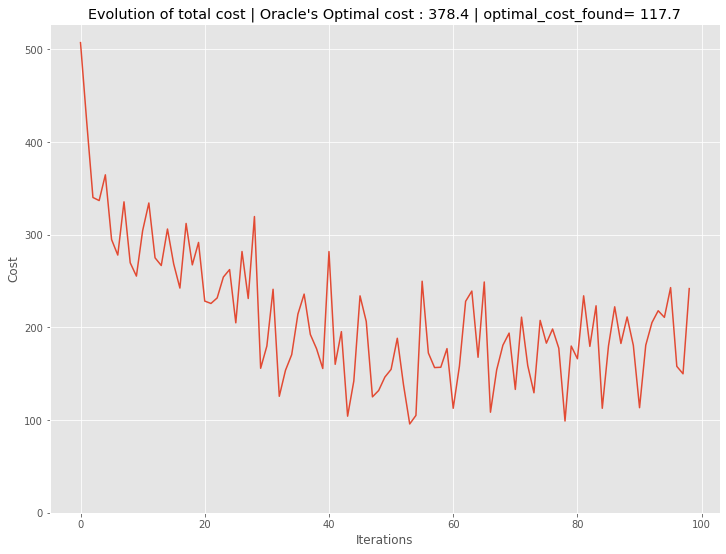

****************************************************************************************************************************
Number of agents with random path = 10
Agents creation, random (start, destination) assignment and all possible paths computation ...
Agents creation, random (start, destination) assignment and all possible paths computation  : Done
-------------------------------------------------------------------------------------------
Oracle calculations ==> Global optimal paths and costs...
Time depassed 1 seconds, only 828 combinations where tested
Total time to compute costs:1.00 s
 => The minimal cost is :  492.3712278748799
 => The optimal paths are :  [[11, 10, 9, 14, 18], [7, 5, 1, 0, 2], [4, 3, 10], [15, 17, 19, 20], [3, 4, 5, 7], [0, 2, 11, 12, 23], [18, 14, 9, 10, 3, 2, 0], [3, 4, 5, 7, 6], [21, 19, 17], [0, 2, 3, 10, 13], [12, 11, 2, 3], [14, 9, 10, 3, 2, 0], [14, 18, 16, 9]]
Oracle calculations ==> Global optimal paths and costs : Done
---------------------------


Paths found by the agents :
sto1   {'path': [11, 10, 9, 14, 18], 'cost': 48.31320462407476}
adv1   {'path': [7, 6, 17, 19, 21, 20, 23, 12, 11, 2], 'cost': 60.321540303713945}
hyb1   {'path': [4, 8, 9, 10], 'cost': 27.73953320811087}
Final total cost on the network : 136.37427813589957


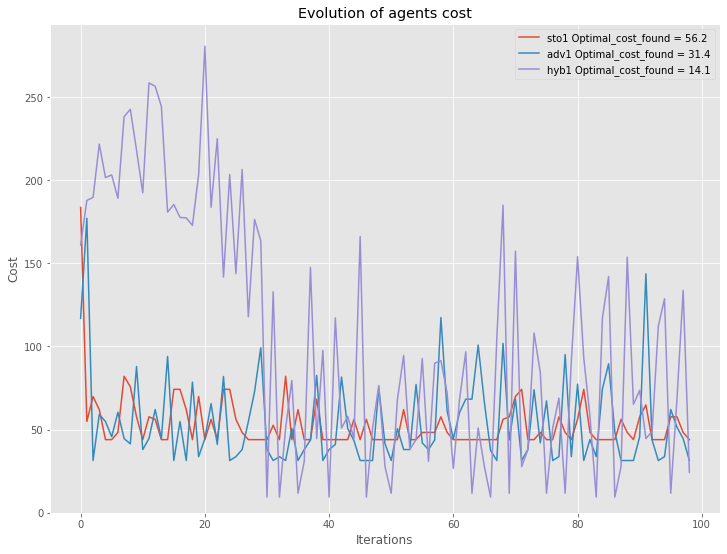

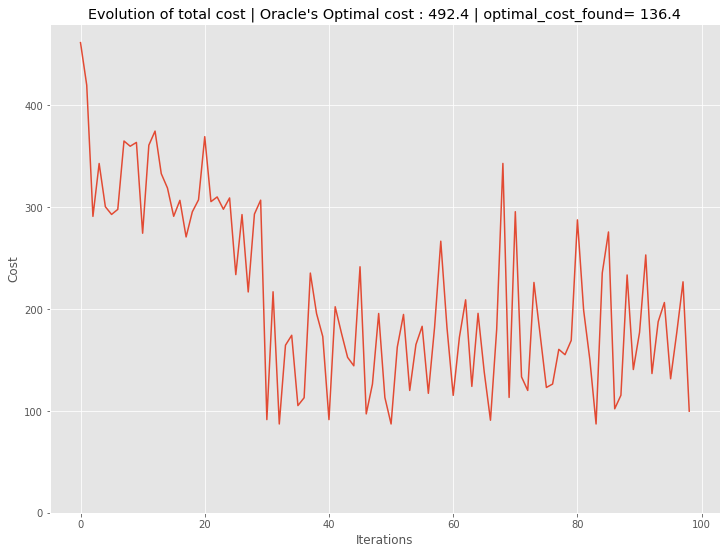

****************************************************************************************************************************


In [17]:
n_players = 1
n_rnd_agents = [1, 2, 5, 8, 10]
graph = 'Sioux_Falls'
g, adj_matrix, all_edges = create_graph(graph_type=graph, number_vertices=20, dropout_edge_rate=0.8)
for i, n_randx in enumerate(n_rnd_agents) : 
    print('Number of agents with random path = {}'.format(n_randx), end='\n')
    summary_experiences = run_experiment_compar(g, adj_matrix, all_edges, assignement_type='random', nb_iterations=100, n_sto=n_players, n_adv=n_players, n_hyb=n_players, 
                                   n_rand=n_randx, n_fix=0, exploration_parameter_stoc=5, eta_hyb=0.1, Bt_hyb=0.01, use_adaptif_lr_hyb=False,
                                gamma_hyb=1., time_limit=1)

        
        
        

Graph creation...
Graph creation : Done
-------------------------------------------------------------------------------------------
Number of agents with random path = 10
Agents creation, random (start, destination) assignment and all possible paths computation ...
Agents creation, random (start, destination) assignment and all possible paths computation  : Done
-------------------------------------------------------------------------------------------
Oracle calculations ==> Global optimal paths and costs...
Time depassed 1 seconds, only 804 combinations where tested
Total time to compute costs:1.00 s
 => The minimal cost is :  368.0625897750652
 => The optimal paths are :  [[6, 7, 15, 16], [12, 11, 2, 3], [5, 1, 0, 2, 11, 12], [20, 21, 14, 9, 8, 4], [7, 8], [12, 11, 10, 9, 8], [8, 4], [8, 9, 14, 18], [13, 10, 3, 2], [8, 9], [6, 7, 15], [8, 9, 10], [10, 3, 2, 0]]
Oracle calculations ==> Global optimal paths and costs : Done
-------------------------------------------------------------


Paths found by the agents :
sto1   {'path': [6, 17, 15, 16], 'cost': 14.729519053989074}
adv1   {'path': [12, 11, 2, 3], 'cost': 11.312671991280833}
hyb1   {'path': [5, 1, 0, 2, 3, 4, 8, 7, 15, 16, 9, 10, 11, 12], 'cost': 130.05368566364058}
Final total cost on the network : 156.09587670891048


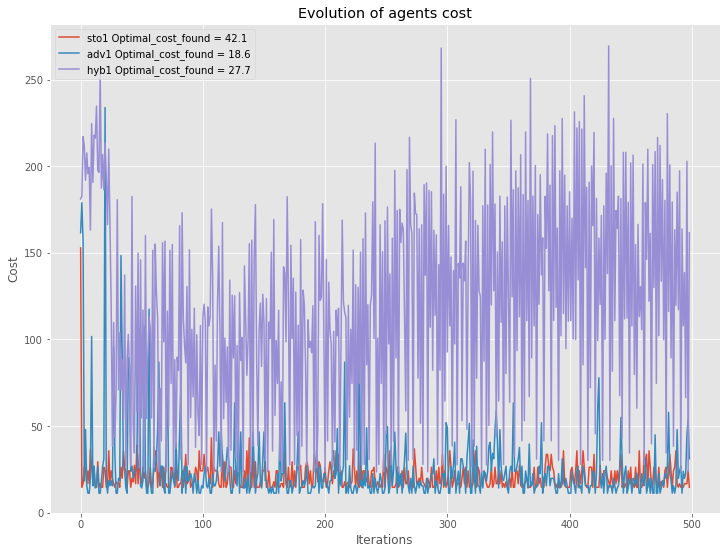

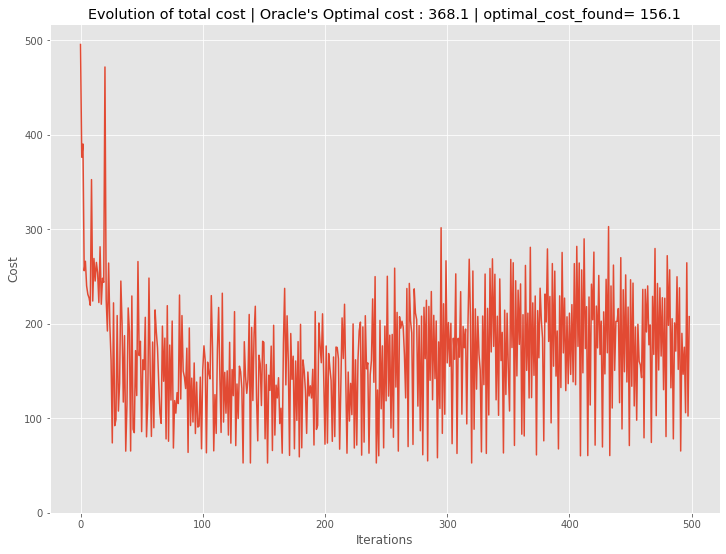

****************************************************************************************************************************


In [18]:
n_players = 1
n_rnd_agents = [10]
graph = 'Sioux_Falls'
g, adj_matrix, all_edges = create_graph(graph_type=graph, number_vertices=20, dropout_edge_rate=0.8)
for i, n_randx in enumerate(n_rnd_agents) : 
    print('Number of agents with random path = {}'.format(n_randx), end='\n')
    summary_experiences = run_experiment_compar(g, adj_matrix, all_edges, assignement_type='random', nb_iterations=500, n_sto=n_players, n_adv=n_players, n_hyb=n_players, 
                                   n_rand=n_randx, n_fix=0, exploration_parameter_stoc=5, eta_hyb=0.1, Bt_hyb=0.01, use_adaptif_lr_hyb=False,
                                gamma_hyb=1., time_limit=1)

        
        
        